In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 导入数据集

## 1.1 读取文件 csv

In [2]:
path = 'wine.csv'
dataset = pd.read_csv(path)

## 1.2 查看（首尾）数据

In [3]:
dataset.head()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
dataset.tail()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,diluted wines,proline
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.7,0.62,1.71,660
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840


## 1.3 数据统计信息

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
class                   177 non-null int64
alcohol                 177 non-null float64
malic acid              177 non-null float64
ash                     177 non-null float64
alcalinity of ash       177 non-null float64
magnesium               177 non-null int64
total phenols           177 non-null float64
flavanoids              177 non-null float64
nonflavanoid phenols    177 non-null float64
proanthocyanins         177 non-null float64
color intensity         177 non-null float64
hue                     177 non-null float64
diluted wines           177 non-null float64
proline                 177 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.4 KB


**无空数据，不需要额外处理**

In [6]:
dataset.describe()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,diluted wines,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.932203,12.994237,2.326384,2.364407,19.466667,99.762712,2.296497,2.036441,0.360734,1.592260,5.034689,0.959412,2.617401,747.949153
std,0.773078,0.809641,1.112355,0.273670,3.327599,14.320209,0.627353,0.997087,0.123904,0.573694,2.303684,0.227710,0.707886,315.484679
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.220000,0.270000,1.250000,3.210000,0.790000,1.960000,500.000000
50%,2.000000,13.050000,1.860000,2.360000,19.500000,98.000000,2.360000,2.140000,0.340000,1.560000,4.680000,0.970000,2.780000,675.000000
75%,3.000000,13.670000,3.030000,2.550000,21.500000,107.000000,2.800000,2.880000,0.430000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 1.4 按类划分

In [7]:
class_1st = dataset[dataset['class'] == 1] 
class_2nd = dataset[dataset['class'] == 2]
class_3rd = dataset[dataset['class'] == 3]

## 1.5 划分训练集与测试集（各类5/5分，交叉验证）

In [8]:
lens = np.array([len(class_1st), len(class_2nd), len(class_3rd)])
k = np.uint8(lens * 0.5)

class_1st_1 = class_1st[:k[0]]; class_1st_2 = class_1st[k[0]:]
class_2nd_1 = class_2nd[:k[1]]; class_2nd_2 = class_2nd[k[1]:]
class_3rd_1 = class_3rd[:k[2]]; class_3rd_2 = class_3rd[k[2]:]

dataset_1 = pd.concat([class_1st_1, class_2nd_1, class_3rd_1])
dataset_2 = pd.concat([class_1st_2, class_2nd_2, class_3rd_2])

# 2. 分类器设计

## 2.1 sigmoid 函数

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

**计算时可能会发生溢出，但不用理会。比如：**

In [10]:
np.exp(1000)

d:\program files\python\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

**绘制sigmoid图像**

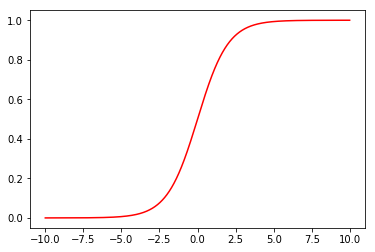

In [11]:
tmp_x = np.arange(-10.0, 10.0, 0.01)
plt.plot(tmp_x, sigmoid(tmp_x), 'r')
plt.show()

## 2.2 梯度下降法，求带正则项的代价函数的最小 θ

In [12]:
def grad_descent(X, Y, λ=0, α=0.01, cycleNum=1000):
    """
    输入参数：
        X：mxn 矩阵，np.array类型，数据集里的特征数据
        Y：mx1 列向量
        α：学习率
        n：最大迭代次数
        λ：正则项系数
    """
    m, n = X.shape
    X = np.hstack([np.ones((m, 1)), X])      # 为X增加偏置列
    XT = X.T                                 # 转置X
    weights = np.ones((n+1, 1))              # 模型系数向量 weights，nx1

    for k in range(cycleNum):               # 不建议使用 np.matrix类
        h = sigmoid(np.matmul(X, weights))   # 矩阵乘法，建议使用 np.matmul：  m x 3 ，3 x 1
        weights = weights - α * (np.matmul(XT, h - Y) - λ*weights)
        
    return weights

## 2.3 分类器模型

In [13]:
def classifier(X, weights):
    m, n = X.shape
    X = np.hstack([np.ones((m, 1)), X])      # 为X增加偏置列
    
    exp1 = np.exp(np.matmul(X, weights[0]))
    exp2 = np.exp(np.matmul(X, weights[1]))
    
    categories = []
    for e1, e2 in zip(exp1, exp2):
        if not (e1 + e2):
            category = 3
        elif not e1:
            category = 2
        elif not e2:
            category = 1
        categories.append(category)

    return categories

## 2.4 评估函数

In [14]:
def evaluate(reallabel, predlabel):
    sum = 0
    for r, p in zip(reallabel, predlabel):
        if r == p:
            sum += 1
    wrongNum = len(reallabel) - sum
    return sum/len(reallabel), wrongNum

# 3. 模型训练与评估

## 3.1 使用数据集-1 训练

**划分X, Y：**

In [15]:
x_train = dataset_1.values[:, 1:]
y_train = dataset_1.values[:, 0:1]   # 取出单独一列时，要保证是列向量，不然容易出问题
print(x_train.shape, y_train.shape)

(87, 13) (87, 1)


**多次训练，得到各类对应的分类器：**分三类问题，只需要2个分类器

In [16]:
m, n = x_train.shape
weights = []
for i in range(2):   # 分三类问题，只需要2个分类器
    y_bin = np.zeros_like(y_train)
    for j in range(m):
        y_bin[j] = 1 if y_train[j] == i+1 else 0
    # print(f'\n第{i+1}类：\n', y_bin)
    w = grad_descent(x_train, y_bin, λ=1)
    weights.append(w)
print(weights)

d:\program files\python\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[array([[  -161995.51793239],
       [ -2042281.82603742],
       [  -427243.40032127],
       [  -342317.26810786],
       [ -4393740.98513655],
       [-14891988.62876225],
       [  -137611.5363237 ],
       [    99316.69754494],
       [   -65249.20276917],
       [   -77660.64394519],
       [  -558957.61382568],
       [  -125395.90336584],
       [  -175699.44125328],
       [  1980041.07162272]]), array([[ 108412.92216678],
       [ 841442.98050234],
       [-263859.03645383],
       [ 133302.19408723],
       [1680270.92154285],
       [5248461.11917205],
       [ 252653.56846353],
       [ 251504.18741767],
       [  55056.94509405],
       [ 198932.0532691 ],
       [-506474.85809909],
       [ 211706.76566342],
       [ 391901.7339552 ],
       [-889453.5024769 ]])]


## 3.2 使用数据集-2 测试、评估

In [17]:
x_test = dataset_2.values[:, 1:]
y_test = dataset_2.values[:, 0:1]   # 取出单独一列时，要保证是列向量，不然容易出问题

In [18]:
y_pred = classifier(x_test, weights)
accuracy, wrongNum = evaluate(y_test, y_pred)
print (f'正确率是：{accuracy}\n识别错误个数：{wrongNum}')

正确率是：0.7666666666666667
识别错误个数：21


d:\program files\python\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
d:\program files\python\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


## 3.3 使用数据集-2 训练

In [19]:
x_train = dataset_2.values[:, 1:]
y_train = dataset_2.values[:, 0:1]   # 取出单独一列时，要保证是列向量，不然容易出问题
print(x_train.shape, y_train.shape)
m, n = x_train.shape
weights = []
for i in range(2):   # 分三类问题，只需要2个分类器
    y_bin = np.zeros_like(y_train)
    for j in range(m):
        y_bin[j] = 1 if y_train[j] == i+1 else 0
    # print(f'\n第{i+1}类：\n', y_bin)
    w = grad_descent(x_train, y_bin, λ=1)
    weights.append(w)
print(weights)

(90, 13) (90, 1)
[array([[  -164523.60183997],
       [ -2072095.37015522],
       [  -623827.46772824],
       [  -399438.73181269],
       [ -4832339.5879722 ],
       [-15029674.54513599],
       [  -183644.44109035],
       [    47110.5891604 ],
       [   -88047.93122529],
       [  -188726.49364947],
       [  -941020.69039929],
       [   -94836.3143865 ],
       [  -253668.45238249],
       [  2119236.19477538]]), array([[  141767.27811921],
       [ 1159112.32332429],
       [  120963.54805403],
       [  248403.04927927],
       [ 2710020.30939452],
       [ 9034971.88765891],
       [  359740.64622265],
       [  477189.38473735],
       [   52921.39362096],
       [  306294.67617898],
       [ -733177.61308427],
       [  187502.73701751],
       [  547919.22991018],
       [-1550736.11295956]])]

d:\program files\python\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


## 3.4 使用数据集-1 测试、评估

In [20]:
x_test = dataset_1.values[:, 1:]
y_test = dataset_1.values[:, 0:1]   # 取出单独一列时，要保证是列向量，不然容易出问题
y_pred = classifier(x_test, weights)
accuracy, wrongNum = evaluate(y_test, y_pred)
print (f'正确率是：{accuracy}\n识别错误个数：{wrongNum}')

正确率是：0.5862068965517241
识别错误个数：36


d:\program files\python\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
d:\program files\python\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


## 3.5 使用全体数据集

In [21]:
x_train = dataset.values[:, 1:]
y_train = dataset.values[:, 0:1]   # 取出单独一列时，要保证是列向量，不然容易出问题
print(x_train.shape, y_train.shape)
m, n = x_train.shape
weights = []
for i in range(2):   # 分三类问题，只需要2个分类器
    y_bin = np.zeros_like(y_train)
    for j in range(m):
        y_bin[j] = 1 if y_train[j] == i+1 else 0
    # print(f'\n第{i+1}类：\n', y_bin)
    w = grad_descent(x_train, y_bin, λ=1)
    weights.append(w)
print(weights)

(177, 13) (177, 1)


d:\program files\python\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[array([[  -349112.60996919],
       [ -4151980.90414322],
       [ -1073101.95304051],
       [  -767532.39576769],
       [ -9296544.66542014],
       [-30196341.60770737],
       [  -340751.25504111],
       [   129497.97671877],
       [  -175409.83494413],
       [  -284983.74273001],
       [ -1479684.81115868],
       [  -242199.60737598],
       [  -446183.79600316],
       [  4094588.69124827]]), array([[  216736.69819733],
       [ 1829857.13660472],
       [ -212439.04485601],
       [  334133.84506839],
       [ 4063392.18584927],
       [13102679.42031993],
       [  581273.93635673],
       [  715493.56218924],
       [   80846.34154729],
       [  468937.44258288],
       [-1368522.9144776 ],
       [  372029.58817831],
       [  909926.53096636],
       [-2235098.67299862]])]


In [22]:
x_test = dataset.values[:, 1:]
y_test = dataset.values[:, 0:1]   # 取出单独一列时，要保证是列向量，不然容易出问题
y_pred = classifier(x_test, weights)
accuracy, wrongNum = evaluate(y_test, y_pred)
print (f'正确率是：{accuracy}\n识别错误个数：{wrongNum}')

正确率是：0.6836158192090396
识别错误个数：56


d:\program files\python\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
d:\program files\python\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
